In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Anaconda_Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
df = pd.read_csv('Dataset.csv',header=0)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.shape

(41188, 21)

# How many term depositors are there in the data? 

In [7]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# What is the baseline likelihood of term depositors in the data? This tells us that in absence of ML, what is the success rate
of the Telemarketing Team in being able to sell a Term Loan

In [10]:
df['target']=np.where(df['y'].isin(['yes']),1,0)

In [11]:
df['target'].mean()

0.11265417111780131

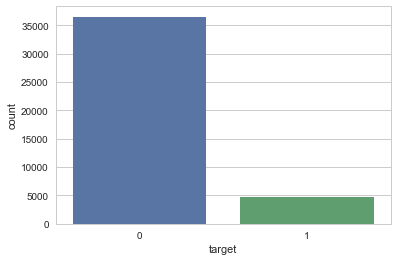

In [12]:
sns.countplot(x='target',data=df)
plt.show()

In [13]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


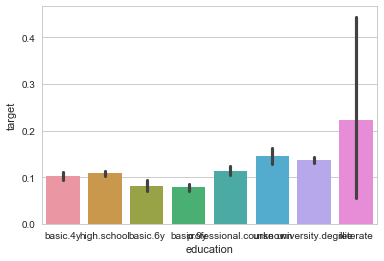

In [14]:
from numpy import mean
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)

In [15]:
df.groupby('education')['target'].mean()

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64

In [18]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='illiterate', 'unknown', df['education'])


In [19]:
df.groupby('education')['target'].mean()

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


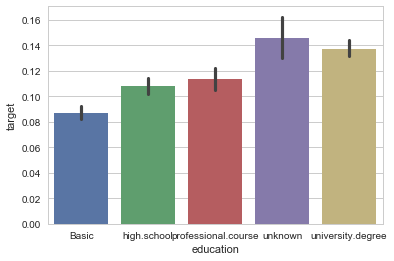

In [20]:
from numpy import mean
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)

The graph studies are done to ascertain whether a variable discriminates the dependent variable are defines a slope across
X Axis

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


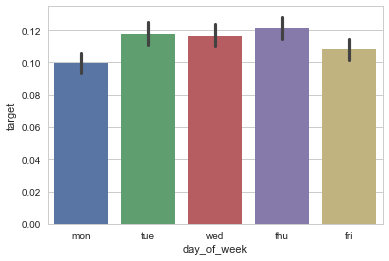

In [22]:
from numpy import mean
ax = sns.barplot(x="day_of_week", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


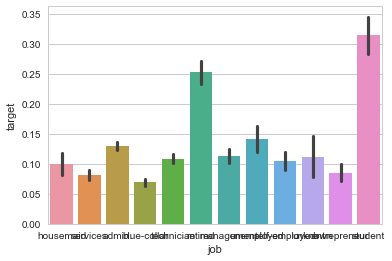

In [23]:
from numpy import mean
ax = sns.barplot(x="job", y="target", data=df, estimator=mean)

In [29]:
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64

In [30]:
df['job']=np.where(df['job'] =='unknown', 'unemployed', df['job'])
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


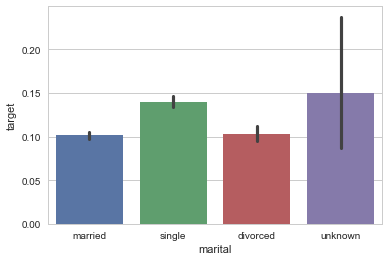

In [31]:
from numpy import mean
ax = sns.barplot(x="marital", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


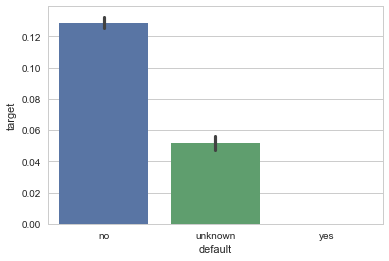

In [32]:
from numpy import mean
ax = sns.barplot(x="default", y="target", data=df, estimator=mean)

In [35]:
df.groupby('default')['target'].count()

default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64

In [40]:
df['default']=np.where(df['default'] =='unknown', 'yes', df['default'])
df.groupby('default')['target'].mean()

default
no     0.128790
yes    0.051512
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


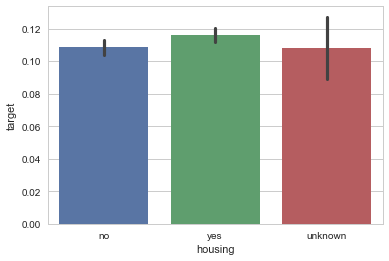

In [39]:
from numpy import mean
ax = sns.barplot(x="housing", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


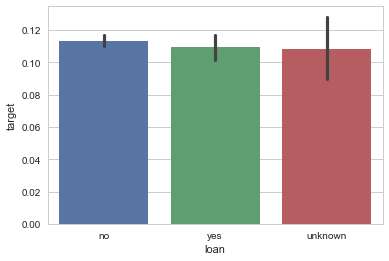

In [41]:
from numpy import mean
ax = sns.barplot(x="loan", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


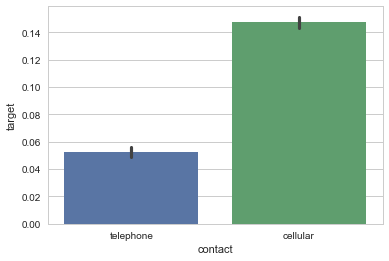

In [42]:
from numpy import mean
ax = sns.barplot(x="contact", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


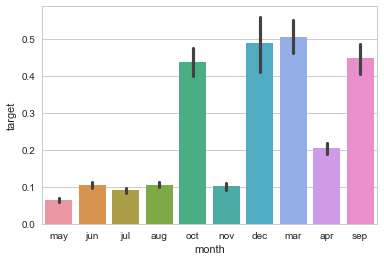

In [43]:
from numpy import mean
ax = sns.barplot(x="month", y="target", data=df, estimator=mean)

In [44]:
df['qtr']=np.where(df['month'].isin(['jan','feb','mar']),'Q1',np.where(df['month'].isin(['apr','may','jun']),'Q2',np.where(df['month'].isin(['jul','aug','sep']),'Q3',np.where(df['month'].isin(['oct','nov','dec']),'Q4',0))))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


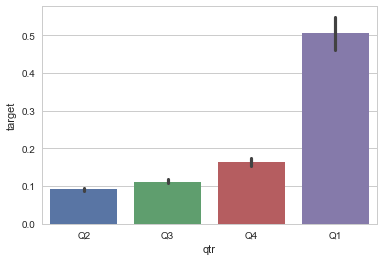

In [45]:
from numpy import mean
ax = sns.barplot(x="qtr", y="target", data=df, estimator=mean)

In [46]:
df.groupby('qtr')['target'].mean()

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


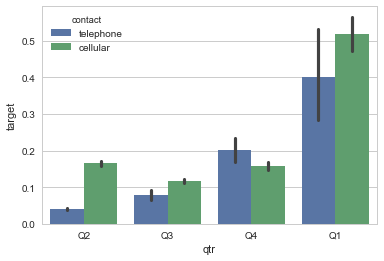

In [47]:
from numpy import mean
ax = sns.barplot(x="qtr", y="target", hue="contact", data=df, estimator=mean)

In [53]:
df['age_rank']=pd.qcut(df['age'].rank(method='first').values,5,duplicates='drop').codes+1
df.groupby('age_rank')['age'].max()

age_rank
1    31
2    35
3    41
4    49
5    98
Name: age, dtype: int64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


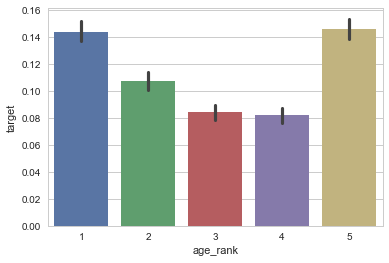

In [52]:
from numpy import mean
a=sns.barplot(x="age_rank",y="target",data=df,estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


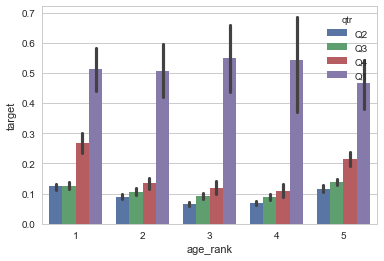

In [88]:
from numpy import mean
ax = sns.barplot(x="age_rank", y="target", hue="qtr", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


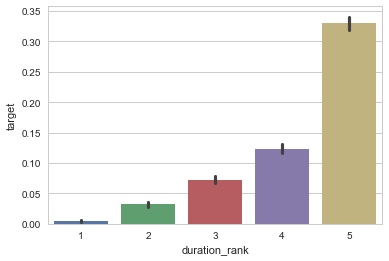

In [54]:
df['duration_rank']=pd.qcut(df['duration'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="duration_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


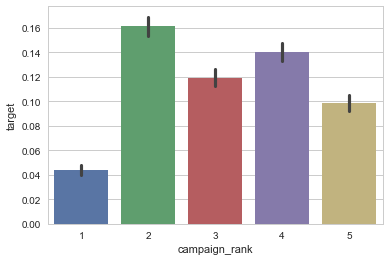

In [56]:
df['campaign_rank']=pd.qcut(df['campaign'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="campaign_rank", y="target", data=df, estimator=mean)

In [60]:
df.groupby('campaign_rank')['target'].mean()

campaign_rank
1    0.043700
2    0.161345
3    0.119325
4    0.140342
5    0.098568
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


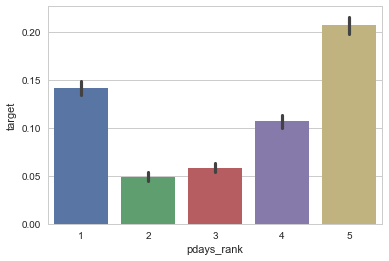

In [61]:
df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


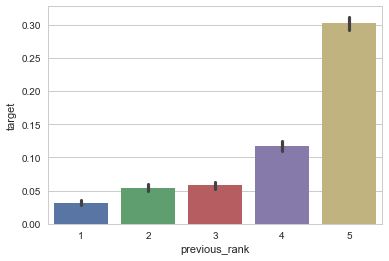

In [62]:
df['previous_rank']=pd.qcut(df['previous'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="previous_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


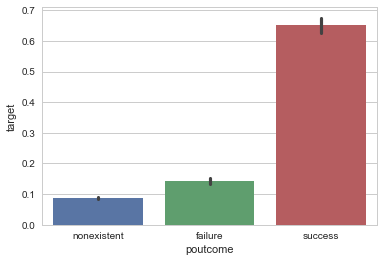

In [97]:
ax = sns.barplot(x="poutcome", y="target", data=df, estimator=mean)

Combine the Failure and the NonExistent group into a group called Failure

In [63]:
df['poutcome_new']=np.where(df['poutcome'].isin(['failure','nonexistent']),0,1)
df.groupby('poutcome_new')['target'].mean()

poutcome_new
0    0.094085
1    0.651129
Name: target, dtype: float64

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


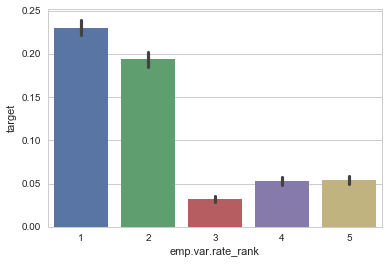

In [105]:
df['emp.var.rate_rank']=pd.qcut(df['emp.var.rate'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="emp.var.rate_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


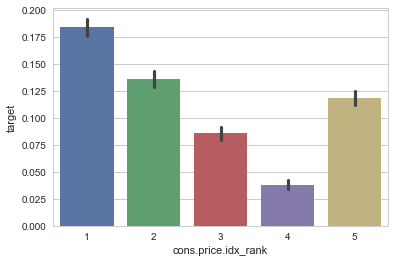

In [66]:
df['cons.price.idx_rank']=pd.qcut(df['cons.price.idx'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="cons.price.idx_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


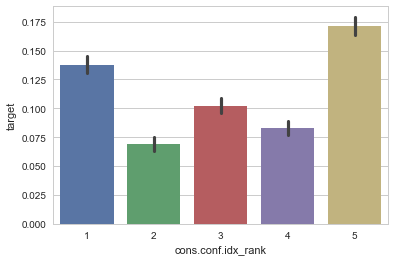

In [67]:
df['cons.conf.idx_rank']=pd.qcut(df['cons.conf.idx'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="cons.conf.idx_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


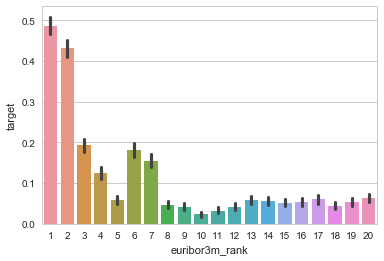

In [75]:
df['euribor3m_rank']=pd.qcut(df['euribor3m'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="euribor3m_rank", y="target", data=df, estimator=mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


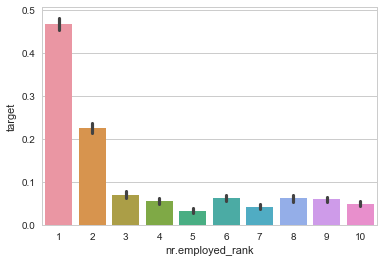

In [76]:
df['nr.employed_rank']=pd.qcut(df['nr.employed'].rank(method='first').values,10,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="nr.employed_rank", y="target", data=df, estimator=mean)

In [83]:
df['employ_rank']=np.where(df['nr.employed_rank'].isin(['3','4','5','6','7','8','9','10']),'C',
                  np.where(df['nr.employed_rank'].isin(['1']),'A',
                  np.where(df['nr.employed_rank'].isin(['2']),'B','X')))

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


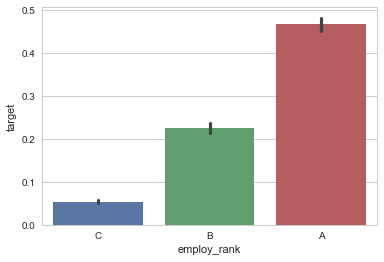

In [84]:
from numpy import mean
ax = sns.barplot(x="employ_rank", y="target", data=df, estimator=mean)

In [114]:
df.isnull().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
target                 0
qtr                    0
age_rank               0
duration_rank          0
campaign_rank          0
pdays_rank             0
previous_rank          0
poutcome_new           0
emp.var.rate_rank      0
cons.price.idx_rank    0
cons.conf.idx_rank     0
euribor3m_rank         0
nr.employed_rank       0
dtype: int64

In [102]:
col_num= ['pdays','emp.var.rate','euribor3m','previous','campaign','cons.price.idx','emp.var.rate']
col_char=['qtr','education','job','contact','employ_rank']

In [103]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [104]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [105]:
# rows 
X_var=X_all
Y_var=df['target']

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_1000.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [91]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [92]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.90


In [93]:
y_pred_RF=rf_1000.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.89


In [94]:
rf_1000_score_train = rf_1000.score(X_train, y_train)
print("Training score: ",rf_1000_score_train)
rf_1000_score_test = rf_1000.score(X_test, y_test)
print("Testing score: ",rf_1000_score_test)

Training score:  0.8872047448926502
Testing score:  0.8876750020231448


In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20630     5]
 [  278     1]]


In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20635
          1       0.00      0.00      0.00       279

avg / total       0.97      0.99      0.98     20914



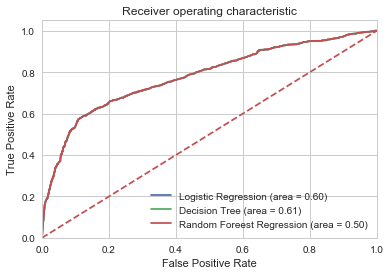

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Predictions from the models

In [109]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['target'].mean()

P_Rank
1     0.038116
2     0.032775
3     0.036174
4     0.060709
5     0.054868
6     0.057295
7     0.058038
8     0.088614
9     0.206846
10    0.493081
Name: target, dtype: float64

In [111]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['target'].mean()

P_Rank_dtree
1     0.024521
2     0.032775
3     0.045642
4     0.059738
5     0.044671
6     0.055839
7     0.066537
8     0.083758
9     0.201748
10    0.511289
Name: target, dtype: float64

In [113]:
df.head()
df.to_csv('telemarketing_model_scored_file.csv')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome_new,cons.conf.idx_rank,cons.price.idx_rank,euribor3m_rank,nr.employed_rank,employ_rank,y_pred_P,P_Rank,y_pred_P_dtree,P_Rank_dtree
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,0,4,4,10,4,C,0.037701,3,0.026356,1
1,57,services,married,high.school,yes,no,no,telephone,may,mon,...,0,4,4,10,4,C,0.030858,2,0.026356,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,4,4,10,4,C,0.030858,2,0.026356,1
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,0,4,4,10,4,C,0.037190,3,0.026356,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,4,4,10,4,C,0.030858,2,0.026356,1
